# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [38]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_2'] = tips['tip_pct'] * tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.61


<Axes: xlabel='net_bill', ylabel='tip'>

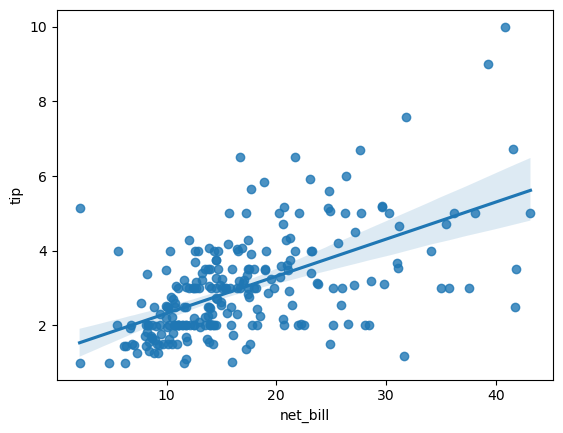

In [22]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips)

In [30]:
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        16:48:30   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<Axes: xlabel='net_bill', ylabel='tip_pct'>

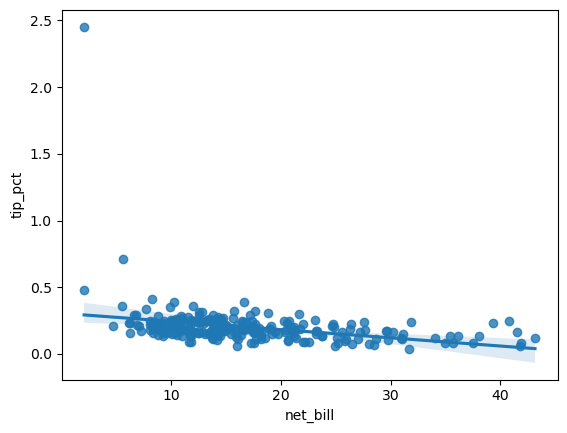

In [20]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

In [32]:
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        16:49:04   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro grafico representa o valor da gorjeta e apresenta dados mais dispersos e distantes do modelo do que o segundo grafico, que apresenta o percentual das gorjetas, fazendo com que seus coefficientes de correlacao sejam bem diferentes. Dessa forma nao comparar diretamente seus R-quadrados devido a essa diferenca da variavel. Tambem notamos que a tendencia do valor das gorjetas eh positiva com o aumento do valor total da conta enquanto que com o percentual esta tendencia eh negativa. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [34]:
reg_pct.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [40]:
reg_tip2 = smf.ols('tip_2 ~ net_bill', data = tips).fit()

In [44]:
reg_tip2.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [36]:
reg_tip.rsquared

0.3325407312323707

O valor obtido do ajuste no item 1 se apresenta como o mesmo.